In [23]:
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_excel('data/210511_allM_editing_averages.xlsx',sheet_name='DEN')
df = df[['condition', 'species', 'sum_abs.3','Labelled_fraction.3','Labelled_absolute.3']].copy()

In [40]:
tissue = 'Kidney'
df_tissue = df[df['condition'].str.contains(tissue)]

In [41]:
print(list(set(df_tissue['condition'])))

['HCC_Kidney_30', 'HCC_Kidney_15', 'HCC_Kidney_120', 'HCC_Kidney_60']


In [42]:
toPlot = pd.DataFrame(index=['HCC_Kidney_15','HCC_Kidney_30', 'HCC_Kidney_60','HCC_Kidney_120'],
                      columns = list(set(df_tissue['species'])))

In [43]:
for index,row in df_tissue.iterrows():
    condition = row['condition']
    species = row['species']
    value = row['Labelled_absolute.3']
    toPlot.at[condition,species] = value

In [44]:
toPlot = toPlot.fillna(0)
toPlot

,a-Glycerophosphate 445,a-Glycerophosphate 357,Glucose 160,Glutamic acid 246,scyllo-Inositol 318,myo-Inositol 318,Alanine 116,Histidine 254,Isoleucine 158,Ornithine 142,...,Glucose 319,Glutamine 347,Glycerol 117,Citric acid 465,Glycine 174,Malic acid 245,Methionine 176,Norleucine 158,3-Phosphoglycerate 357,a-ketoglutaric acid 304
HCC_Kidney_15,7.934872,8.185456,3.631114,1.869297,0,0,0.311503,0,0,0,...,3.246509,0.009134,0.320767,0.017435,0,0.072660,0,0,0.010486,0.006646
HCC_Kidney_30,0.536284,0.721707,2.162391,4.476534,0,0,0.230568,0,0,0,...,2.042535,0.002598,0.280486,0.030954,0,0.063377,0,0,0.003747,0.011604
HCC_Kidney_60,0.488060,0.782622,3.217622,4.372112,0,0,0.339696,0,0,0,...,3.218862,0.009452,0.099738,0.031854,0,0.079875,0,0,0.004325,0.015046
HCC_Kidney_120,0.362924,0.453317,0.678136,1.861963,0,0,0.126596,0,0,0,...,0.652787,0.006544,0.026704,0.011962,0,0.022565,0,0,0.001246,0.007696


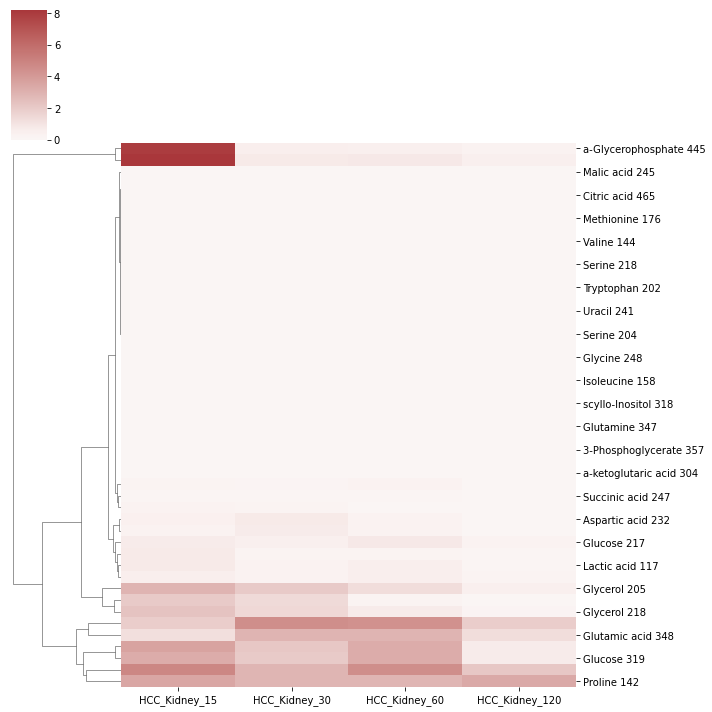

In [45]:
sns.clustermap(toPlot.T,col_cluster=False,cmap='vlag',center=0)